In [3]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [4]:
df=pd.read_csv('C:\\Users\\HP-PC\\Downloads\\weatherAUS.csv\\weatherAUS.csv')
print(df.shape)
print(df.columns)
print(df.info)

(142193, 24)
Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')
<bound method DataFrame.info of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
142188  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
14

In [5]:
le=LabelEncoder()
df['Rain']=le.fit_transform(df.RainToday)

In [6]:
df_clean=df[['MinTemp', 'MaxTemp','WindGustSpeed','Humidity9am','Rain']]
df_clean
df_clean.describe()

,MinTemp,MaxTemp,WindGustSpeed,Humidity9am,Rain
count,141556.000000,141871.000000,132923.000000,140419.000000,142193.000000
mean,12.186400,23.226784,39.984292,68.843810,0.240989
std,6.403283,7.117618,13.588801,19.051293,0.450212
min,-8.500000,-4.800000,6.000000,0.000000,0.000000
25%,7.600000,17.900000,31.000000,57.000000,0.000000
50%,12.000000,22.600000,39.000000,70.000000,0.000000
75%,16.800000,28.200000,48.000000,83.000000,0.000000
max,33.900000,48.100000,135.000000,100.000000,2.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [8]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Rain
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,0


In [9]:
df_clean.head(10)

,MinTemp,MaxTemp,WindGustSpeed,Humidity9am,Rain
0,13.4,22.9,44.0,71.0,0
1,7.4,25.1,44.0,44.0,0
2,12.9,25.7,46.0,38.0,0
3,9.2,28.0,24.0,45.0,0
4,17.5,32.3,41.0,82.0,0
5,14.6,29.7,56.0,55.0,0
6,14.3,25.0,50.0,49.0,0
7,7.7,26.7,35.0,48.0,0
8,9.7,31.9,80.0,42.0,0
9,13.1,30.1,28.0,58.0,1


In [10]:
df_clean.corr()

,MinTemp,MaxTemp,WindGustSpeed,Humidity9am,Rain
MinTemp,1.000000,0.736267,0.177285,-0.234211,0.052938
MaxTemp,0.736267,1.000000,0.067690,-0.505432,-0.214304
WindGustSpeed,0.177285,0.067690,1.000000,-0.215461,0.146862
Humidity9am,-0.234211,-0.505432,-0.215461,1.000000,0.332000
Rain,0.052938,-0.214304,0.146862,0.332000,1.000000


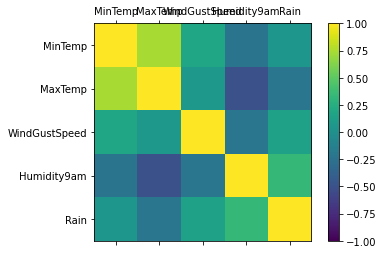

In [11]:
correlations=df_clean.corr()
fig=pyplot.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=np.arange(0,5,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df_clean.columns)
ax.set_yticklabels(df_clean.columns)
pyplot.show()

In [12]:
df_clean.dropna(inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131371 entries, 0 to 142192
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        131371 non-null  float64
 1   MaxTemp        131371 non-null  float64
 2   WindGustSpeed  131371 non-null  float64
 3   Humidity9am    131371 non-null  float64
 4   Rain           131371 non-null  int32  
dtypes: float64(4), int32(1)
memory usage: 5.5 MB


c:\users\hp-pc\appdata\local\programs\python\python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [13]:
from sklearn.model_selection import train_test_split
X=df_clean.iloc[:,:4]
Y=df_clean['Rain']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [15]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred1=lr.predict(X_test)
accuracy_score(Y_test,Y_pred1)

c:\users\hp-pc\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8220338983050848

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
Y_pred2=knn.predict(X_test)
accuracy_score(Y_test,Y_pred2)

0.8096772556581752

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred3=rf.predict(X_test)
accuracy_score(Y_test,Y_pred3)

0.8184309347406881

In [18]:
y=np.array(([33,33,33,33],[34,32,22,30]))
lr.predict_proba(y)

array([[0.82941983, 0.14685381, 0.02372636],
       [0.84223454, 0.12805801, 0.02970745]])

In [19]:
from joblib import dump,load
dump(lr,'modelimp.joblib')

['modelimp.joblib']